In [1]:
# Import necessary modules

%load_ext autoreload
%autoreload 2

from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft

LOG.propagate = False

In [142]:
# Get ArtemisBLEController object
ble = get_ble_controller()

# Connect to the Artemis Device
ble.connect()

2024-03-20 00:11:33,590 | INFO     |: Looking for Artemis Nano Peripheral Device: c0:89:c5:6d:2f:4b
2024-03-20 00:11:40,314 | INFO     |: Connected to c0:89:c5:6d:2f:4b


In [3]:
# tof_reading = []   # Stores the sensor reading in millimeters
# tof_extrapolate = []   # Stores the extrapolated sensor reading in millimeters

yaw = []
pid_ctrl = []
p_ctrl = []
i_ctrl = []
d_ctrl = []
pid_error = []
ref_angle = []
timestamp = []      # Timestamps in milliseconds

def notification_handler(uuid, byte_array):
    yaw.append(((float) (ble.bytearray_to_string(byte_array).split(", ")[0])))
    pid_ctrl.append(((float) (ble.bytearray_to_string(byte_array).split(", ")[1])))
    p_ctrl.append(((float) (ble.bytearray_to_string(byte_array).split(", ")[2])))
    i_ctrl.append(((float) (ble.bytearray_to_string(byte_array).split(", ")[3])))
    d_ctrl.append(((float) (ble.bytearray_to_string(byte_array).split(", ")[4])))
    pid_error.append(((float) (ble.bytearray_to_string(byte_array).split(", ")[5])))
    ref_angle.append(((float) (ble.bytearray_to_string(byte_array).split(", ")[6])))
    timestamp.append(((float) (ble.bytearray_to_string(byte_array).split(", ")[-1])))

ble.start_notify(ble.uuid['RX_STRING'], notification_handler)

In [143]:
ble.start_notify(ble.uuid['RX_STRING'], notification_handler)

In [144]:
ble.send_command(CMD.KP_SET, "5")

In [145]:
ble.send_command(CMD.KI_SET, "0.005")

In [146]:
ble.send_command(CMD.KD_SET, "300")

In [147]:
# tof_reading.clear()
# tof_extrapolate.clear()
yaw.clear()
pid_ctrl.clear()
p_ctrl.clear()
i_ctrl.clear()
d_ctrl.clear()
pid_error.clear()
ref_angle.clear()
timestamp.clear()

ble.send_command(CMD.START_IMU_PID, "")

In [148]:
ble.send_command(CMD.REF_ANGLE_SET, "90")

In [149]:
ble.send_command(CMD.REF_ANGLE_SET, "180")

In [150]:
ble.send_command(CMD.REF_ANGLE_SET, "0")

In [151]:
ble.send_command(CMD.STOP_IMU_PID, "")

In [152]:
ble.send_command(CMD.GET_IMU_PID_INFO, "")

In [156]:
timestamp[-1]-timestamp[0]

4356.0

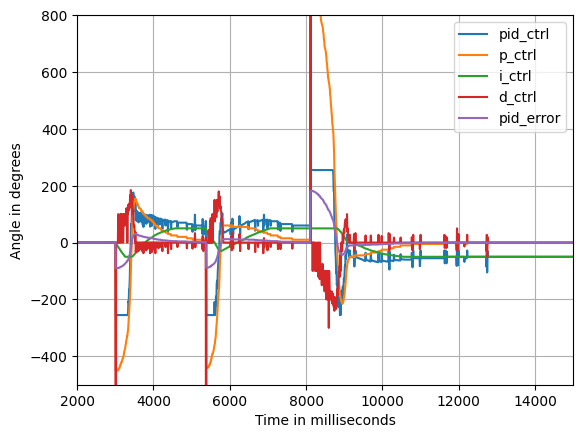

2024-03-20 05:22:22,921 | INFO     |: Disconnected from C0:89:C5:6D:2F:4B


In [168]:
data_N = len(timestamp)

# Time domain figure
time = np.linspace(0., (timestamp[-1] - timestamp[0]), num=data_N)
# plt.plot(time, yaw, label='yaw')
plt.plot(time, pid_ctrl, label='pid_ctrl')
plt.plot(time, p_ctrl, label='p_ctrl')
plt.plot(time, i_ctrl, label='i_ctrl')
plt.plot(time, d_ctrl, label='d_ctrl')
plt.plot(time, pid_error, label='pid_error')
# plt.plot(time, ref_angle, label='ref_angle')
plt.legend()
plt.grid()
plt.xlim([2000, 15000])
plt.ylim([-500, 800])
plt.title('')
plt.xlabel('Time in milliseconds')
plt.ylabel('Angle in degrees')
plt.show()